In [1]:
import torch

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from torch.utils.data import Dataset

In [4]:
from torchvision import datasets

In [2]:
from torchvision.transforms import ToTensor

In [3]:
import matplotlib.pyplot as plt

In [6]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=False,
    transform=ToTensor()
)

In [7]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [13]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

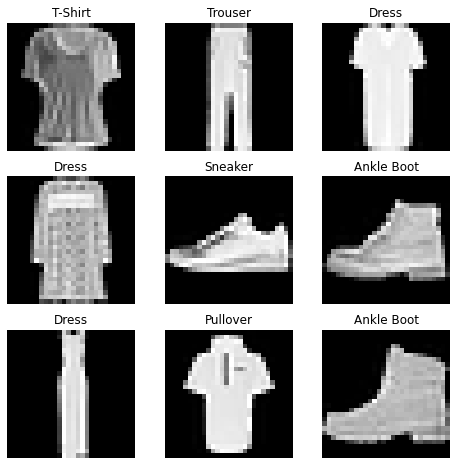

In [17]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [7]:
training_fer2013 = datasets.FER2013(
    root="../data",
    split="train",
    transform=ToTensor()
)

In [8]:
test_fer2013 = datasets.FER2013(
    root="../data",
    split="test",
    transform=ToTensor()
)

In [9]:
labels_map = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral",
}

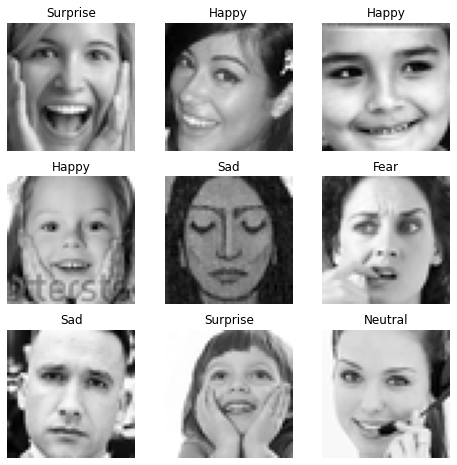

In [10]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_fer2013), size=(1,)).item()
    img, label = training_fer2013[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [11]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_fer2013, batch_size=64, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_fer2013, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 48, 48])
Labels batch shape: torch.Size([64])


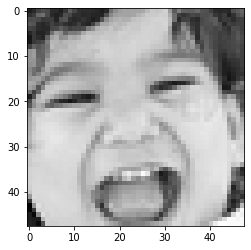

Label: 3


In [12]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [25]:
from torchvision.transforms import Lambda

In [26]:
train_fer2013 = datasets.FER2013(
    root="../data",
    split="train",
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(7, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [30]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
model = NeuralNetwork().to(device)
print(model)

In [90]:
w = torch.tensor([0.5,0.3,0.2])

In [91]:
x = torch.tensor([1.,0.,1.])

In [92]:
b = -0.7

In [41]:
wt = w.transpose

In [45]:
torch.matmul(w, x).size()

torch.Size([])

In [93]:
torch.matmul(w, x) + b# torch.Size([])

tensor(0.)

In [53]:
xt = torch.t(x)

In [54]:
xt

tensor([1, 1, 0, 1, 0])

In [60]:
x = torch.zeros(5,1)

In [66]:
x[0][0]

tensor(0.)

In [41]:
listt = list([1,1,0,1,0])

In [42]:
for key, value in enumerate(listt):
    x[key][0] = value

IndexError: index 3 is out of bounds for dimension 0 with size 3

In [80]:
w = torch.zeros(1,5)

tensor(0.)

In [39]:
wlist = list([3,1,5,7,4])

In [40]:
for key, value in enumerate(wlist):
    w[0][key] = value

IndexError: index 1 is out of bounds for dimension 0 with size 1

In [88]:
w

tensor([[3., 1., 5., 7., 4.]])

In [94]:
x = torch.zeros(3,2)

In [35]:
x = torch.tensor([[0.,3.],[5.,9.],[-1.,-2.]])

In [36]:
y = torch.tensor([[1.],[1.],[-1.]])

In [37]:
w = torch.tensor([[-1.],[1.]])

In [38]:
torch.matmul(w, x) + b# torch.Size([])

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x1 and 3x2)

In [102]:
w

tensor([[-1.],
        [ 1.]])

In [111]:
xt = torch.transpose(x,1,3)

IndexError: Dimension out of range (expected to be in range of [-2, 1], but got 3)

In [124]:
x = torch.tensor([1,2,3])

In [125]:
w = torch.tensor([4,5,6])

In [126]:
b = 3

In [129]:
## Homogeneous Dimension

In [131]:
torch.matmul(w, x) + b# torch.Size([]) This can be represented as below

tensor(35)

In [132]:
x = torch.tensor([1,2,3,1])

In [133]:
w = torch.tensor([4,5,6,3]) # 1 is added in x and 3 that is bias is added in the w vector.

In [134]:
torch.matmul(w, x)

tensor(35)

In [135]:
x = torch.tensor([2,4,1])

In [136]:
w = torch.tensor([1,-5,-1])

In [137]:
w + x

tensor([ 3, -1,  0])

In [138]:
1 + x

tensor([3, 5, 2])

In [2]:
wo = torch.tensor([1,1,-1])

In [3]:
w1 = torch.tensor([2,0,-1])

In [4]:
w2 = torch.tensor([1,2,2])

In [5]:
x = torch.tensor([2,1,1])

In [8]:
torch.matmul(wo, x) / (torch.matmul(wo, x) + torch.matmul(w1, x) + torch.matmul(w2, x))

tensor(0.1818)

In [11]:
po = torch.exp(torch.matmul(wo, x)) / (torch.exp(torch.matmul(wo, x)) + torch.exp(torch.matmul(w1, x)) + torch.exp(torch.matmul(w2, x)))

In [12]:
p1 = torch.exp(torch.matmul(w1, x)) / (torch.exp(torch.matmul(wo, x)) + torch.exp(torch.matmul(w1, x)) + torch.exp(torch.matmul(w2, x)))

In [13]:
p2 = torch.exp(torch.matmul(w2, x)) / (torch.exp(torch.matmul(wo, x)) + torch.exp(torch.matmul(w1, x)) + torch.exp(torch.matmul(w2, x)))

In [16]:
po

tensor(0.0171)

In [17]:
p1

tensor(0.0466)

In [18]:
p2

tensor(0.9362)

In [19]:
po+p1+p2

tensor(1.)

In [47]:
w = torch.tensor([[3,4],[1,9],[6,2]])

In [48]:
x = torch.tensor([1,2])

In [49]:
torch.matmul(w, x)

tensor([11, 19, 10])

In [50]:
wo = torch.tensor([3,4])

In [52]:
w1 = torch.tensor([1,9])

In [53]:
w2 = torch.tensor([6,2])

In [54]:
po = torch.exp(torch.matmul(wo, x)) / (torch.exp(torch.matmul(wo, x)) + torch.exp(torch.matmul(w1, x)) + torch.exp(torch.matmul(w2, x)))

In [55]:
p1 = torch.exp(torch.matmul(w1, x)) / (torch.exp(torch.matmul(wo, x)) + torch.exp(torch.matmul(w1, x)) + torch.exp(torch.matmul(w2, x)))

In [56]:
p2 = torch.exp(torch.matmul(w2, x)) / (torch.exp(torch.matmul(wo, x)) + torch.exp(torch.matmul(w1, x)) + torch.exp(torch.matmul(w2, x)))

In [62]:
po

tensor(0.0003)

In [32]:
1/(1+torch.exp(torch.matmul(w, x)))

tensor(0.9820)

In [33]:
32*32*3

3072

In [34]:
11*18

198

In [35]:
0.10*3

0.30000000000000004

In [36]:
0.10+0.10+0.10

0.30000000000000004

In [38]:
(0.1*2)*3

0.6000000000000001

In [40]:
10*0.1*3

3.0

In [42]:
5*8

40

In [43]:
8*7

56

In [44]:
7*4

28

In [45]:
4*8

32

In [29]:
wo = torch.tensor([[0,0]])

In [30]:
ip = torch.tensor([[0,0],[0,1],[1,0],[1,1]])

In [31]:
ip

tensor([[0, 0],
        [0, 1],
        [1, 0],
        [1, 1]])

In [32]:
torch.matmul(wo, ip)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x2 and 4x2)

In [71]:
wo.size()

torch.Size([1, 2])

In [73]:
ip.size()[0]

2

In [63]:
ysize = torch.tensor(ip.size())

In [61]:
wsize = torch.tensor(wo.size())

In [67]:
wsize - ysize.transpose_(0,1)

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [45]:
ipt = ip.transpose_(0,1)

In [46]:
ipt.size()

torch.Size([2, 4])

In [51]:
p = torch.matmul(wo, ipt)

In [48]:
y = torch.tensor([[0,1,1,1]])

In [50]:
y.size()

torch.Size([1, 4])

In [52]:
p.size()

torch.Size([1, 4])

In [55]:
c = (y - p)

In [57]:
c.sum()

tensor(3)

In [101]:
def LossFunc(w,i, y):
    wsize = w.size()[1]
    ysize = i.size()[0]
    if wsize == ysize:
        p = torch.matmul(w, i)
    else:
        it = i.transpose_(0,1)
        p = torch.matmul(w, it)
        
    c = y - p
    return c.sum()
    

In [102]:
weight = torch.tensor([[1,1]])

In [103]:
inputx = torch.tensor([[0,0],[0,1],[1,0],[1,1]])

In [104]:
true_label = torch.tensor([[0,1,1,1]])

In [105]:
LossFunc(weight, inputx, true_label)

tensor(-1)